In [1]:
# conda activate penguin_web

In [1]:

from selenium import webdriver 
from selenium.webdriver.common.by import By 

import time 
import threading 
import requests 

driver = webdriver.Chrome() 

print("要確認播放器已調到720P.") 

要確認播放器已調到720P.


In [2]:
def open_website(url): 
    driver.get(url)
    #########################################   

'''
def get_720P(L): 
    time.sleep(10)
    L[0] = driver.find_element(By.XPATH, '//div[@class="videoAdUiAttributionContainer"]')
    print(L[0].get_attribute("outerHTML"))
    print('end.')
    #time.sleep(10) 

    #L[0] = driver.find_element(By.XPATH,'//iqpdiv[@class="iqp-btn iqp-btn-definition"]')
'''
def get_html(L): 

    L[1] = driver.find_element(By.XPATH,'//html') 
    

In [3]:
open_website('https://www.iq.com/play/正青春-第6集-2fxb932ntyg?lang=zh_tw') 

In [8]:
def 載愛奇藝(URL ,savePath): 
    import time  
    html='' 
    L=[1,html]

    x = threading.Thread(target = open_website, args=(URL,))  
    x.start() 

    time.sleep(1) 

    z = threading.Thread(target = get_html,args=(L,))  
    z.start() 

    time.sleep(1) 

    import time 
    for _ in range(10): 
        if html=='': 
            html = L[1] 
            time.sleep(1) 

    if html !='': 
        print("ok.") 

    time.sleep(1) 

    html = html.get_attribute('outerHTML')
    print(str(html)) 
    print()

    time.sleep(1) 

    html=html[html.find('"m3u8"')+8 :] 
    m3u8_=html[:html.find('"')]
    m3u8 = m3u8_.split('\\n')        #若手動複製html檔→  m3u8 = m3u8.split('\n') 
    print(m3u8 )
    print() 

    time.sleep(1) 
    
    m3u8 = [item.replace('\\u0026','&')  for item in m3u8 if item[0:12]=='https://data']
    m3u8 
    print('m3u8[0:3] =',m3u8[0],m3u8[1],m3u8[2],sep='\n\n')
    print() 

    time.sleep(1) 


    print('節數',' ', '前六個字節') 
    print('------------------------')


    f=open(savePath, 'wb')    # 要更動   


    for i,url in enumerate(m3u8):

        r = requests.get(url, stream = True ) 
        f.write(r.content)
        print(i,' ', r.content[0:7]) 
        if i % 20 ==0: 
            print()


    f.close() 
    print('完.')


ok.
<html lang="zh"><head><script src="https://s0.2mdn.net/instream/video/client.js" async="" type="text/javascript"></script><script type="text/javascript" async="" src="https://www.googletagmanager.com/gtag/js?id=AW-339868652&amp;l=dataLayer&amp;cx=c"></script><script type="text/javascript" async="" src="https://www.google-analytics.com/analytics.js"></script><script type="text/javascript" async="" src="https://www.googletagmanager.com/gtag/js?id=G-PCTZRE9688&amp;l=dataLayer&amp;cx=c"></script><script src="https://connect.facebook.net/signals/config/267714795126545?v=2.9.147&amp;r=stable&amp;domain=www.iq.com&amp;hme=20c913bdcd4be51a752120153aa5caaecb3ee86c7f26cf737846e40b202aba68&amp;ex_m=62%2C106%2C94%2C98%2C53%2C3%2C88%2C61%2C14%2C86%2C79%2C44%2C46%2C150%2C153%2C164%2C160%2C161%2C163%2C25%2C89%2C45%2C68%2C162%2C145%2C148%2C157%2C158%2C165%2C115%2C13%2C43%2C169%2C168%2C117%2C16%2C29%2C32%2C1%2C36%2C57%2C58%2C59%2C63%2C83%2C15%2C12%2C85%2C82%2C81%2C95%2C97%2C31%2C96%2C26%2C22%2C146%
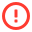
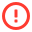
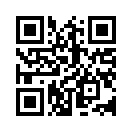

In [10]:
savePath=r'c:\Users\User\Desktop\正青春\ep10.ts'
URL = 'https://www.iq.com/play/正青春-第10集-kdaox81cgs?lang=zh_tw' 
# 要更動

載愛奇藝(URL,savePath)